In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

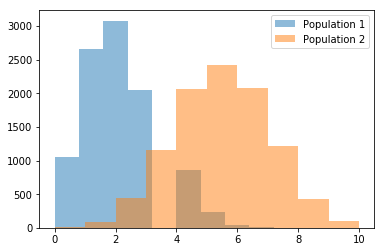

In [6]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

The populations are not normal. Next, take a sample of 100 from each population and plot them.

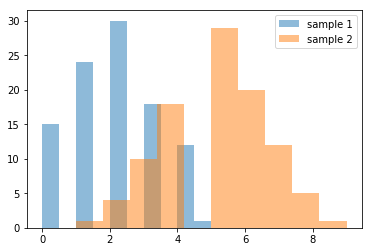

In [7]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

Next, compute the means  and standard deviations for each group.  Note that the mean represents `n * p`: the probability of an event occurring (`p`) multiplied by the number of repetitions (`n`).  To get p for each sample, divide by `n`, which we set to 10 when generating the populations.

In [8]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

1.91
5.09
1.2577360613419653
1.5433405327405874
3.1799999999999997


Next, calculate the standard error of the sampling distribution of the difference of the means. First, create an array with the size of each variable and another with the standard deviation of each variable. In this case, the sizes are already known since you provided them earlier, but let’s calculate them anyway.

In [9]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

15.972439555985016


Finally, we import the function `ttest_ind` from scipy.stats, which calculates the t-value for us (called “statistic”) and also provides the probability calculation (called “pvalue”).  The t-value we calculated and the t-value given by the function may differ slightly after the hundredth decimal place.  This is due to differences of rounding caused by our multiple-step approach to calculating the t-value.  

In [10]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=15.892376698149931, pvalue=9.56176768908956e-37)


The t-value scales the difference between the two groups by the amount of variance in the two samples. High variability in samples can lead to groups with means that look very different, but when we look at the histogram we see that most of the values in the sample groups overlap. The groups are so variable that the distribution of values is quite broad. For example, Olympic races are split into men’s races and women’s races because men are, on average, faster than women. However, looking at the distribution of running speed in the New York marathon, where women and men run together, it’s clear that running speed has a high degree of variability, and that the distributions for men and women overlap a great deal.

One way to interpret a t-value is as the number of standard errors worth of space separating the group means. A t-value of 2 would indicate that the means are two standard errors apart.

The p-value associated with a t-test indicates the likelihood of getting a difference this large or larger in the samples if the populations were not different. The smaller the p-value, the more likely the difference we see in the samples meaningfully reflects the populations. The p-value in the test you did above is really small, so we can be fairly confident that the difference in means we see is due to a real difference in the population and not due to variability in the samples.

## Assignments

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook above, reproduce the pop1 and pop2 populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

When you've given it a try, you can find a sample solution here.

# 1A

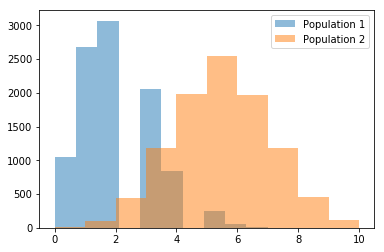

In [11]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

plt.hist(pop1, alpha=0.5, label="Population 1")
plt.hist(pop2, alpha=0.5, label="Population 2")
plt.legend(loc='upper right')
plt.show()

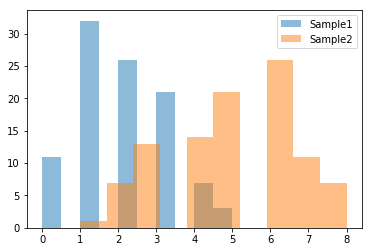

In [13]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='Sample1')
plt.hist(sample2, alpha=0.5, label='Sample2')
plt.legend(loc='upper right')
plt.show()

In [18]:
print(np.mean(sample1))
print(np.mean(sample2))
print(np.std(sample1))
print(np.std(sample2))
diff = sample2.mean() - sample1.mean()
print(diff)

1.9
5.04
1.2288205727444508
1.6668533228811704
3.14


# 1B

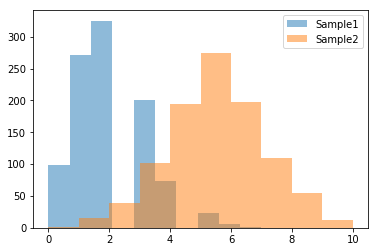

1.981
5.039
1.2298938978627385
1.604829897528084
3.058


In [20]:
sample3 = np.random.choice(pop1, 1000, replace=True)
sample4 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample3, alpha=0.5, label='Sample1')
plt.hist(sample4, alpha=0.5, label='Sample2')
plt.legend(loc='upper right')
plt.show()

print(np.mean(sample3))
print(np.mean(sample4))
print(np.std(sample3))
print(np.std(sample4))
diff = sample4.mean() - sample3.mean()
print(diff)

# 1C

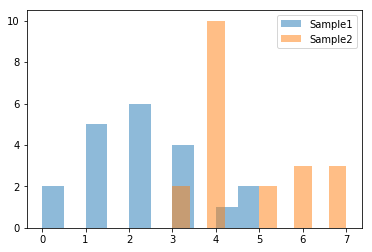

2.15
4.75
1.388344337691482
1.2599603168354152
2.6


In [22]:
sample5 = np.random.choice(pop1, 20, replace=True)
sample6 = np.random.choice(pop2, 20, replace=True)

plt.hist(sample5, alpha=0.5, label='Sample1')
plt.hist(sample6, alpha=0.5, label='Sample2')
plt.legend(loc='upper right')
plt.show()

print(np.mean(sample5))
print(np.mean(sample6))
print(np.std(sample5))
print(np.std(sample6))
diff = sample6.mean() - sample5.mean()
print(diff)

# 2

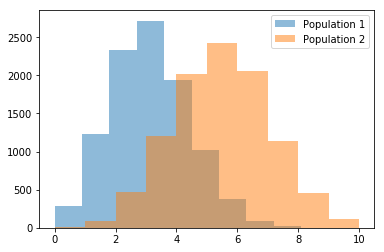

3.34
5.01
1.6924538398432023
1.6278513445643614
1.67
Ttest_indResult(statistic=7.076017096737497, pvalue=2.5174204438247025e-11)


In [28]:
pop1 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

plt.hist(pop1, alpha=0.5, label="Population 1")
plt.hist(pop2, alpha=0.5, label="Population 2")
plt.legend(loc='upper right')
plt.show()

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print(np.mean(sample1))
print(np.mean(sample2))
print(np.std(sample1))
print(np.std(sample2))
diff = sample2.mean() - sample1.mean()
print(diff)

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

# 2B

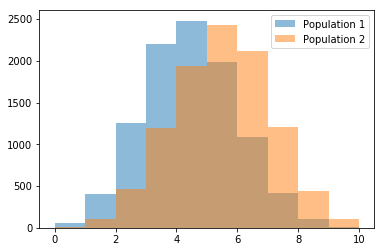

3.9
5.08
1.2767145334803707
1.683330033000065
1.1800000000000002
Ttest_indResult(statistic=5.557212067959683, pvalue=9.471644413221198e-08)


In [30]:
pop1 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

plt.hist(pop1, alpha=0.5, label="Population 1")
plt.hist(pop2, alpha=0.5, label="Population 2")
plt.legend(loc='upper right')
plt.show()

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print(np.mean(sample1))
print(np.mean(sample2))
print(np.std(sample1))
print(np.std(sample2))
diff = sample2.mean() - sample1.mean()
print(diff)

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

In [31]:
# 2. The t-value shrinks and the p-value gets larger as the samples become more similar

In [32]:
# 3. The Central Limit Theorem says the statistics should still work as lopng as the sample size is large enough
# no matter what distribution is chosen